<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1. Load the NHL data

In [3]:
# A:
nhl = pd.read_csv(local_csv)

In [4]:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### 2. Perform any required data cleaning. Do some EDA.

In [5]:
# A:
nhl.isnull().sum()[nhl.isnull().sum()] # no null values

Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
Team    0
dtype: int64

In [6]:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [7]:
nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [8]:
nhl.columns

Index(['Team', 'PTS', 'Rank', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

In [9]:
nhl['Rank'].value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

In [10]:
nhl_corr = nhl.corr()

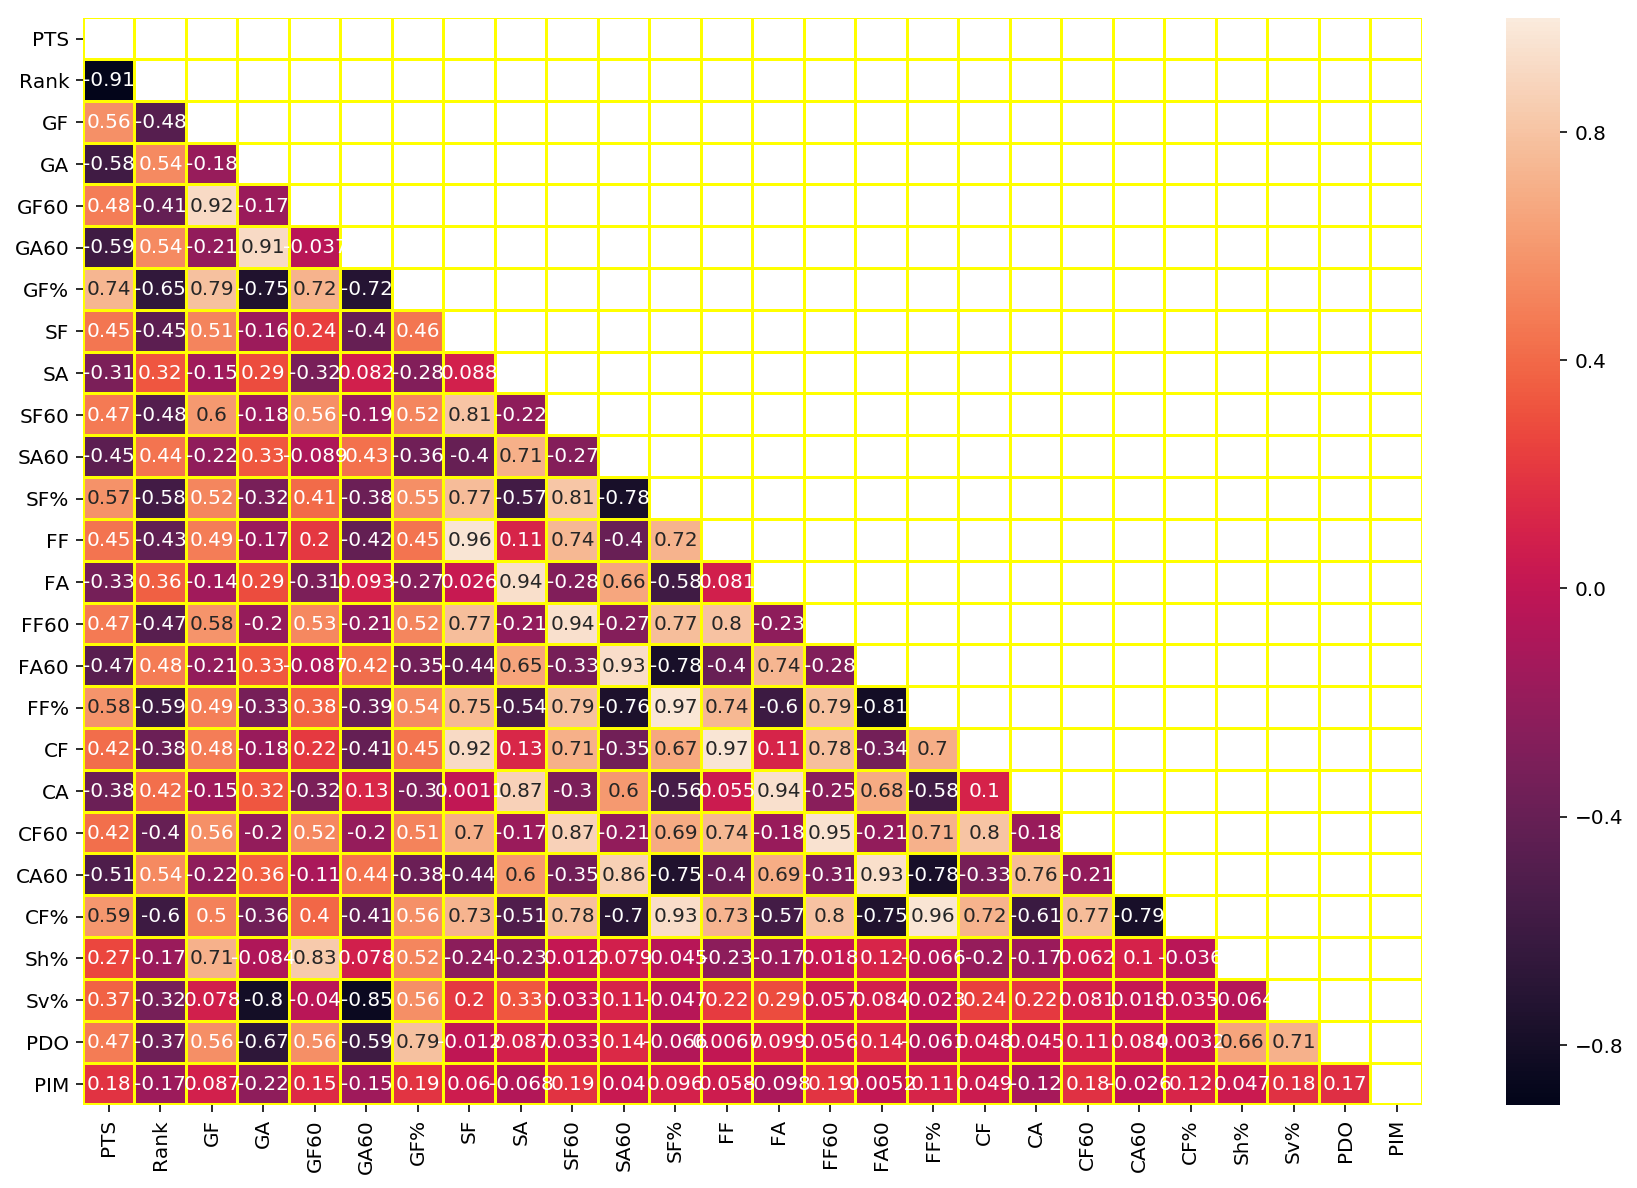

In [11]:
fig, ax = plt.subplots(figsize=(15,10))


mask = np.zeros_like(nhl_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


ax = sns.heatmap(nhl_corr, mask=mask, annot=True, linewidths=1, linecolor='yellow', ax=ax)
plt.show()

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [12]:
# A:

y = nhl['Rank']
y.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 4. What is the baseline accuracy?

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Rank, dtype: int64

In [14]:
# A:
y.value_counts()/y.sum()
# For rank 3 it is 17%
# for rank 2 it is 16%
# for rank 1 it is 16%

3    0.170330
2    0.164835
1    0.159341
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [15]:
# A:
nhl.columns

Index(['Team', 'PTS', 'Rank', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

In [16]:
X = nhl[['GF%', 'SF%', 'CF%', 'PDO']]
X.head()

,GF%,SF%,CF%,PDO
0,61.2,51.5,52.5,1034
1,56.6,52.0,53.4,1014
2,57.0,50.6,51.4,1019
3,55.6,57.7,57.1,992
4,53.8,49.2,52.6,1013


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [17]:
# A:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn1.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [19]:
# A:
from sklearn import metrics
y_predict = knn1.predict(X)
print(y_predict)

print(metrics.accuracy_score(y, y_predict))

# the score gives us a 100% accuracy score as that would be overfitting the data.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
1.0


### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [20]:
# A:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # Train, test, split the dataset

In [30]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

knn_predicty = knn1.predict(X_test) # fit the Xtrain, and ytrain with the kneighbors of 1 annd predict the xtest

In [45]:
print(metrics.accuracy_score(y_test, knn_predicty)) # test the model and see the accuracy

0.6


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [32]:
X_train.shape[0]

60

In [85]:
# A:
knn = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

print('accuracy score:', metrics.accuracy_score(y_test, knn_predict))

# the accuracy score is way lower this time around, would need to go with a lower K nearest neighbor valuue

accuracy score: 0.266666666667


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [54]:
# A:
test_acc = []
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))




In [55]:
print(scores)

[0.59999999999999998, 0.6333333333333333, 0.56666666666666665, 0.5, 0.56666666666666665, 0.56666666666666665, 0.53333333333333333, 0.66666666666666663, 0.76666666666666672, 0.73333333333333328, 0.69999999999999996, 0.73333333333333328, 0.73333333333333328, 0.73333333333333328, 0.69999999999999996, 0.73333333333333328, 0.69999999999999996, 0.56666666666666665, 0.53333333333333333, 0.53333333333333333, 0.53333333333333333, 0.46666666666666667, 0.53333333333333333, 0.46666666666666667, 0.53333333333333333, 0.5, 0.56666666666666665, 0.5, 0.5, 0.46666666666666667, 0.5, 0.46666666666666667, 0.43333333333333335, 0.40000000000000002, 0.43333333333333335, 0.40000000000000002, 0.43333333333333335, 0.40000000000000002, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.40000000000000002, 0.29999999999999999, 0.2666666

In [56]:
knnn_ypredict = knnn.predict(X_test)
print('accuracy score:', metrics.accuracy_score(y_test, knnn_ypredict))

accuracy score: 0.266666666667


### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

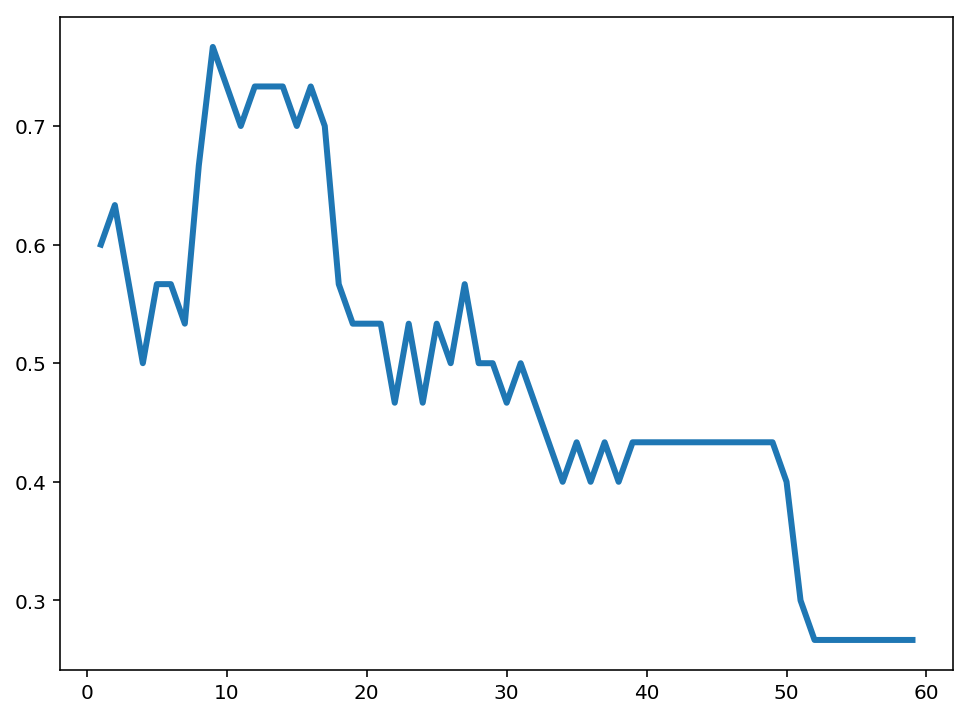

In [58]:
# A:
rowshape = X_train.shape[0]
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0])), scores, lw=3.)
plt.show()




In [63]:
X.shape

(90, 4)

In [80]:

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)
print(max_neighbors)

test_acc1 = []
for n in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=n)
    test_acc1.append(np.mean(cross_val_score(knn, X, y, cv=5)))

72.0


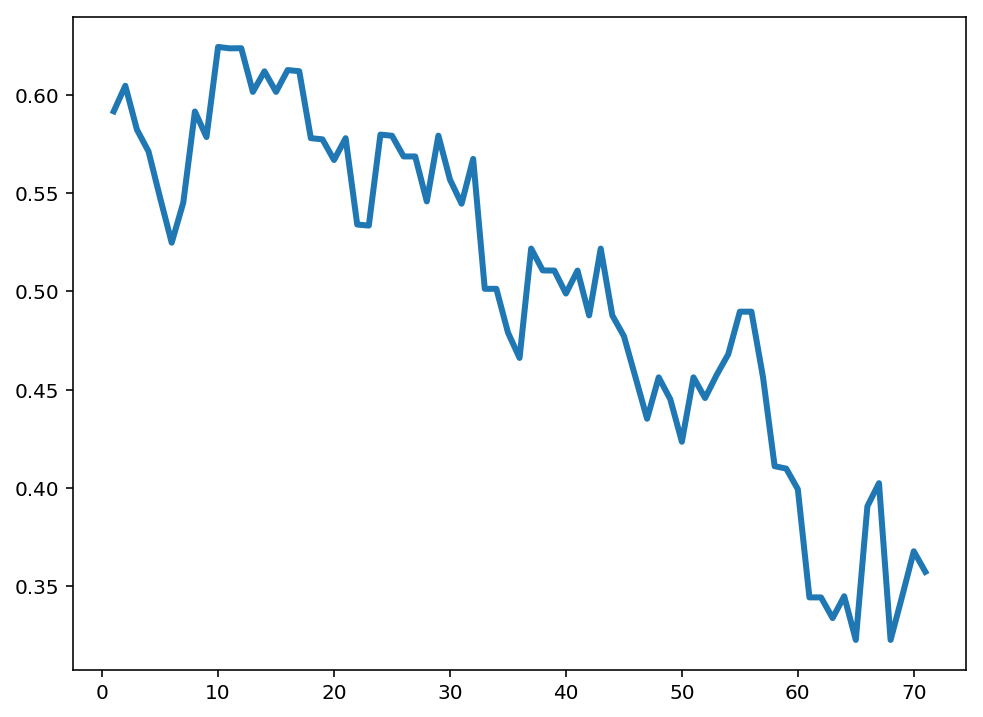

In [81]:

    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc1, lw=3.)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [82]:
# A:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

acc_std = []
for n in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=n)
    acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

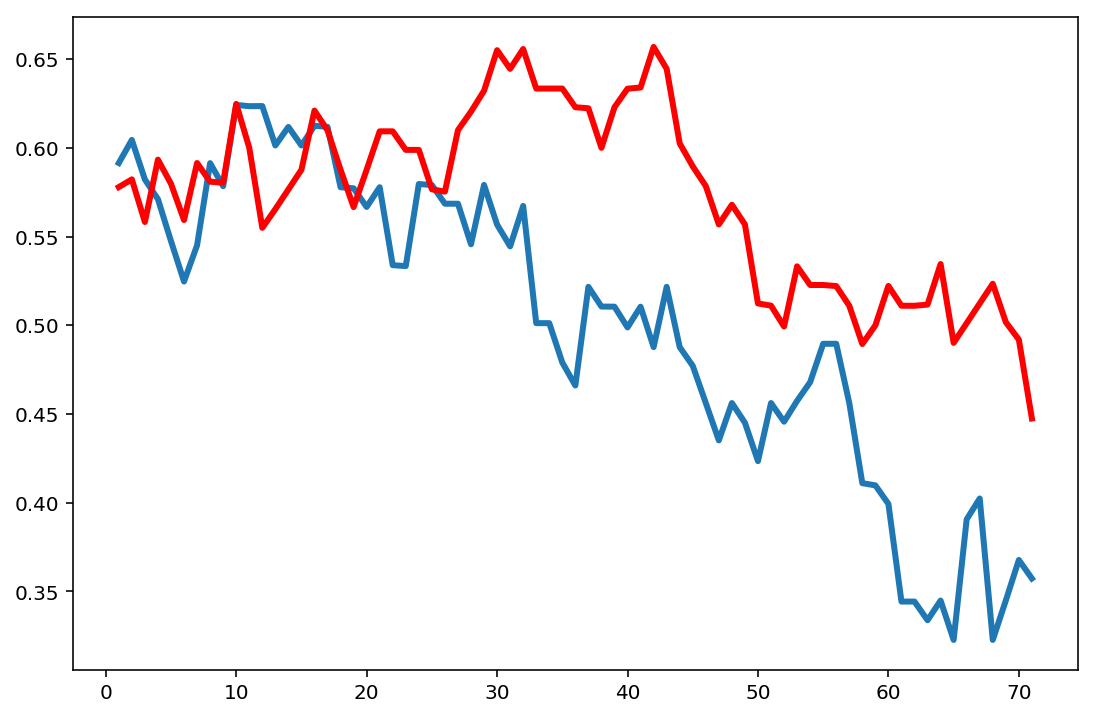

In [84]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(list(range(1, int(max_neighbors))), test_acc1, lw=3)
ax.plot(list(range(1, int(max_neighbors))), acc_std, lw=3, color='red')

plt.show()